<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 Edible Vs Poisonous Mushrooms :</font></h3>
    


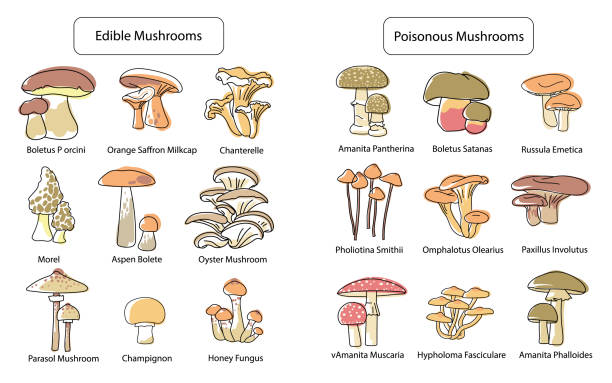

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Competition :</font></h3>
    
**Task**: To develop a model that can classify mushrooms as edible ('e') or poisonous ('p') using a set of physical attributes provided in the dataset.

**Dataset**: Training Dataset (train.csv): Contains features along with the target variable, indicating whether each mushroom is edible or poisonous.Test Dataset (test.csv): Contains the features but requires predictions for whether the mushrooms are edible or poisonous.Additional Information:
    
**Evaluation**: The performance of the model is evaluated using the Matthews correlation coefficient (MCC), a metric that balances true and false positives and negatives, providing a measure of the quality of binary classifications.

The dataset was generated from a deep learning model trained on the UCI Mushroom dataset.

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Importing Libraries</h1>  
     
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import lightgbm as lgb
import gc

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Evalaution Metric</h1>  
     
</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: lightgrey; font-size:100%; text-align:left">

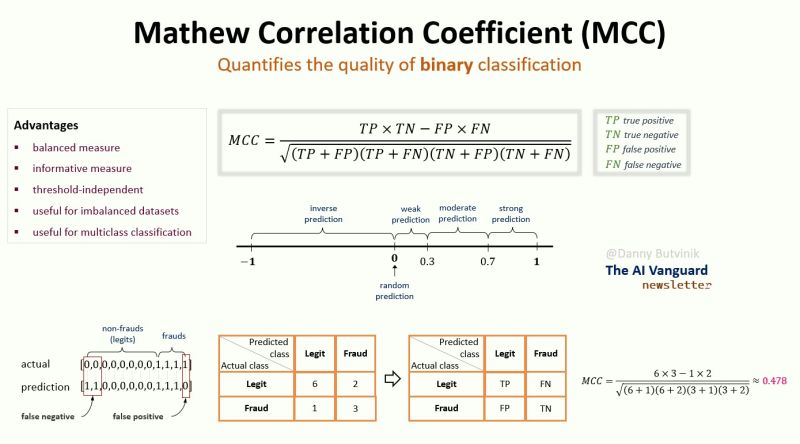

    
      

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Loading  Dataset ♒🌊</h1>  
     
</div>

In [2]:
df_sub=pd.read_csv("Data/sample_submission.csv")
df_train=pd.read_csv("Data/train.csv")
df_test=pd.read_csv("Data/test.csv")

<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: grey; padding: 10px; border-radius: 10px; border: 7px solid cyan; width: 95%;">
  <span style="font-weight: bold; color: blue; animation: pulse 2s infinite;">📉Check </span>
  <span style="font-style: italic; color: #2ca02c; animation: pulse 2s infinite;"> on Data  📊</span> 
</p>

In [5]:
df_train.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [6]:
df_test.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [7]:
df_test.shape,df_train.shape

((2077964, 21), (3116945, 22))

In [3]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>Data Talks :</font></h3>
    
**Intial Drop** : Drop Column ID....🎃
    
**Train & Test Distribution** : Looks Heavy no of rows 🎆    
    
**About Feature Columns** : We have 21 and 22 columns in which we can see, lots of features have missing value 🎭

<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: grey; padding: 10px; border-radius: 10px; border: 7px solid cyan; width: 95%;">
  <span style="font-weight: bold; color: blue; animation: pulse 2s infinite;">📉Checking  </span>
  <span style="font-style: italic; color: #2ca02c; animation: pulse 2s infinite;"> Distribution of categorical features  📊</span> 
</p>

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 499.4+ MB


In [3]:
categorical_columns = df_train.select_dtypes(include=['object']).columns
unique_values = {col: df_train[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")
    
gc.collect()

class: 2 unique values
cap-shape: 74 unique values
cap-surface: 83 unique values
cap-color: 78 unique values
does-bruise-or-bleed: 26 unique values
gill-attachment: 78 unique values
gill-spacing: 48 unique values
gill-color: 63 unique values
stem-root: 38 unique values
stem-surface: 60 unique values
stem-color: 59 unique values
veil-type: 22 unique values
veil-color: 24 unique values
has-ring: 23 unique values
ring-type: 40 unique values
spore-print-color: 32 unique values
habitat: 52 unique values
season: 4 unique values


0

In [4]:
categorical_columns = df_test.select_dtypes(include=['object']).columns
unique_values = {col: df_test[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")
    
gc.collect()

cap-shape: 62 unique values
cap-surface: 59 unique values
cap-color: 57 unique values
does-bruise-or-bleed: 22 unique values
gill-attachment: 66 unique values
gill-spacing: 35 unique values
gill-color: 56 unique values
stem-root: 31 unique values
stem-surface: 54 unique values
stem-color: 55 unique values
veil-type: 15 unique values
veil-color: 23 unique values
has-ring: 23 unique values
ring-type: 36 unique values
spore-print-color: 33 unique values
habitat: 39 unique values
season: 4 unique values


0

In [10]:
df_test.columns

Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [11]:
df_train.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: black; padding: 20px; border-radius: 20px; border: 7px solid cyan; width: 95%;">
  <span style="font-weight: bold; color: blue; animation: pulse 2s infinite;">📉Exploratory</span>
  <span style="font-style: italic; color: #2ca02c; animation: pulse 2s infinite;"> Data Analysis(EDA)  📊</span> 
</p>

In [5]:
import seaborn as sns

In [7]:
missing_train = df_train.isna().mean() * 100
missing_test = df_test.isna().mean() * 100

print("Columns in df_train with more than 10% missing values:")
print(missing_train[missing_train >10])

print("\nColumns in df_test with more than 10% missing values:")
print(missing_test[missing_test > 10])

Columns in df_train with more than 10% missing values:
Series([], dtype: float64)

Columns in df_test with more than 10% missing values:
Series([], dtype: float64)


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>Data Talks :</font></h3>
    
**Common Columns:** Both df_train and df_test share the same columns with more than 10% missing values.
    
**High Missing Values:** The columns stem-root, veil-type, veil-color, and spore-print-color have a very high percentage of missing values, exceeding 80% in both datasets..🎃
    
**Moderate Missing Values:** The columns cap-surface, gill-attachment, gill-spacing, and stem-surface have moderate missing values, ranging from approximately 16% to 63%. 🎭

In [8]:
missing_values = df_train.isnull().mean() * 100
missing_values = missing_values[missing_values >0]
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values Distribution in df_train')
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

In [15]:
!pip install dython

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import category_encoders as ce

missing_threshold = 0.95

high_missing_columns = df_train.columns[df_train.isnull().mean() > missing_threshold]

df_train = df_train.drop(columns=high_missing_columns)
df_test = df_test.drop(columns=high_missing_columns)
target = 'class'

for column in df_train.columns:
    if df_train[column].isnull().any():      
        if df_train[column].dtype == 'object':
            mode_value = df_train[column].mode()[0]
            df_train[column].fillna(mode_value, inplace=True)
            df_test[column].fillna(mode_value, inplace=True)     
        else:
            median_value = df_train[column].median()
            df_train[column].fillna(median_value, inplace=True)
            df_test[column].fillna(median_value, inplace=True)

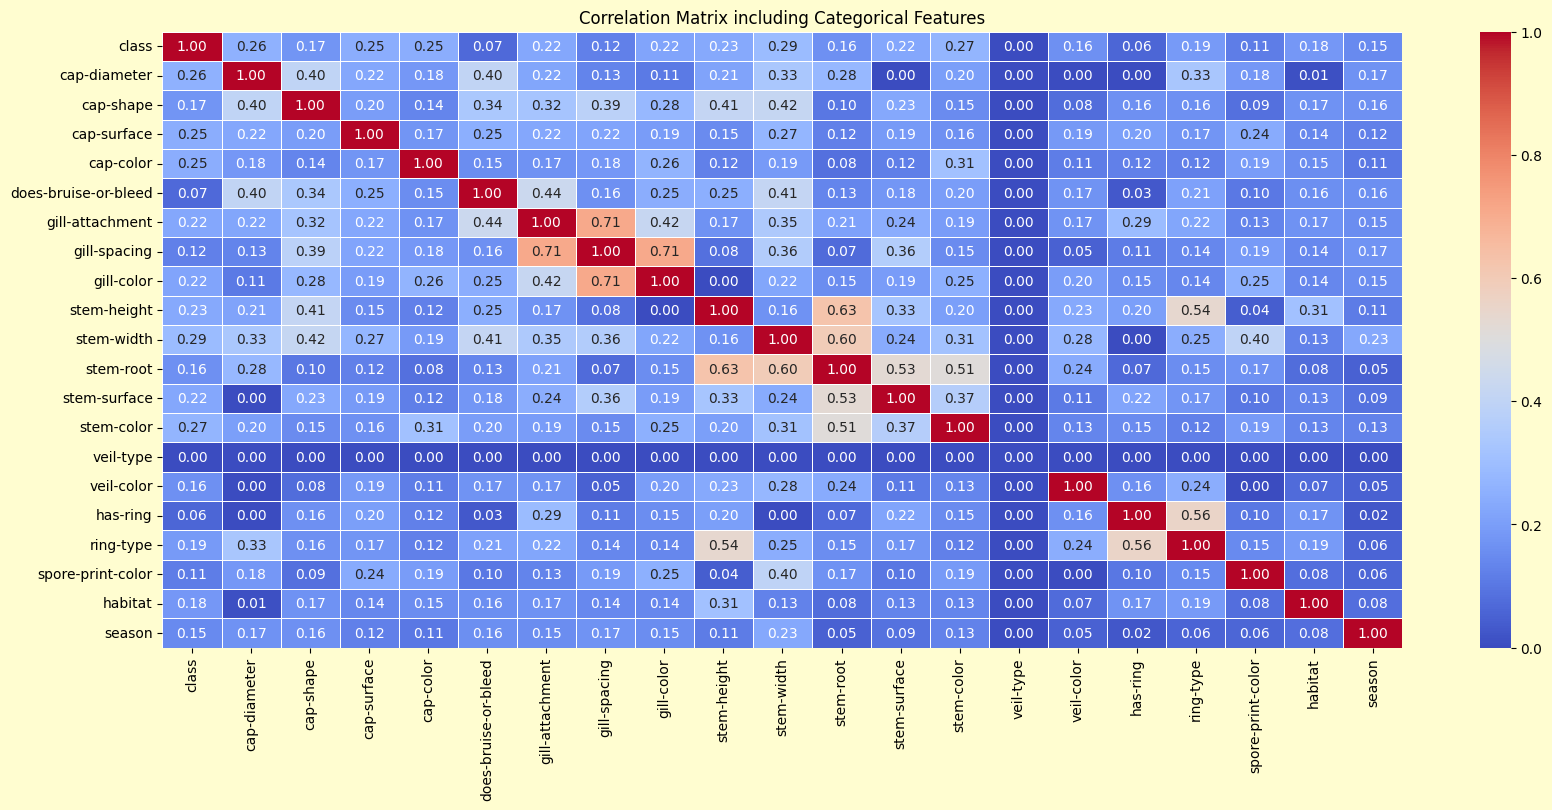

In [17]:
from dython.nominal import associations

associations_df = associations(df_train[:10000], nominal_columns='all', plot=False)
corr_matrix = associations_df['corr']
plt.figure(figsize=(20, 8))
plt.gcf().set_facecolor('#FFFDD0') 
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix including Categorical Features')
plt.show()

In [18]:
import plotly.express as px
df_train1 = df_train[:10000].copy()

feature_counts = df_train1.groupby(['cap-shape', 'cap-color']).size().reset_index(name='count')
fig = px.sunburst(feature_counts, path=['cap-shape', 'cap-color'], values='count',
                 color='count', color_continuous_scale='Viridis',
                 title='Sunburst Chart of Cap Shape and Cap Color Distribution')

fig.update_layout(title_text='Sunburst Chart of Cap Shape and Cap Color Distribution',
                  title_x=0.5,width=900,height=600)  
fig.show()

In [19]:
import plotly.graph_objects as go

flow_data = df_train1.groupby(['cap-shape', 'cap-color']).size().reset_index(name='count')
labels = list(pd.concat([flow_data['cap-shape'], flow_data['cap-color']]).unique())
label_map = {label: idx for idx, label in enumerate(labels)}

sources = flow_data['cap-shape'].map(label_map).tolist()
targets = flow_data['cap-color'].map(label_map).tolist()
values = flow_data['count'].tolist()


fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

fig.update_layout(
    title_text='Sankey Chart of Cap Shape to Cap Color Flow',
    title_x=0.5,  
    width=1000,   
    height=600 
)
fig.show()

In [20]:
feature_counts = df_train1.groupby(['cap-shape', 'cap-color']).size().reset_index(name='count')
fig = px.bar(feature_counts, x='cap-shape', y='count', color='cap-color',
             title='Crosstab Chart of Cap Shape and Cap Color',
             labels={'cap-shape': 'Cap Shape', 'count': 'Count', 'cap-color': 'Cap Color'},
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text='count')  
fig.update_layout(
    title_text='Crosstab Chart of Cap Shape and Cap Color',
    title_x=0.5, 
    xaxis_title='Cap Shape',
    yaxis_title='Count',
    barmode='stack'
)

fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [9]:
cols_to_drop_train = missing_train[missing_train > 95].index
cols_to_drop_test = missing_test[missing_test > 95].index

df_train = df_train.drop(columns=cols_to_drop_train)
df_test = df_test.drop(columns=cols_to_drop_test)
gc.collect()

1155

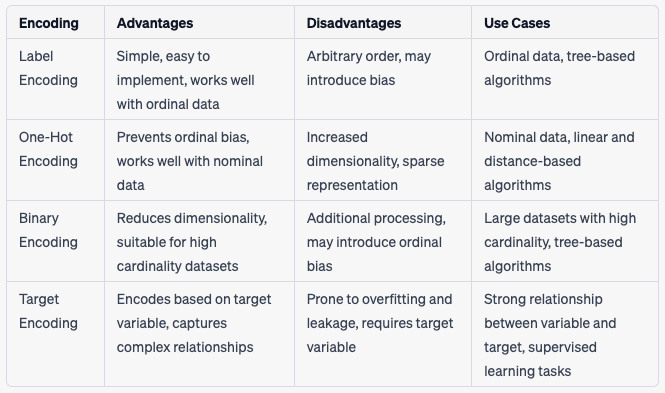

In [10]:
from sklearn.impute import KNNImputer
import pandas as pd

def knn_impute(df, n_neighbors=5):   
    df_encoded = df.copy()
    for col in df_encoded.select_dtypes(include='object').columns:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_encoded), columns=df_encoded.columns)
    for col in df.select_dtypes(include='object').columns:
        df_imputed[col] = df_imputed[col].round().astype(int).map(
            dict(enumerate(df[col].astype('category').cat.categories)))
    return df_imputed

In [11]:
df_train_imputed = knn_impute(df_train, n_neighbors=5)
df_test_imputed = knn_impute(df_test, n_neighbors=5)

In [22]:
df_train_imputed

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,...,b,s,w,u,w,f,f,k,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,b,y,o,u,w,t,z,k,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,b,s,n,u,w,f,f,k,l,w
3,e,3.88,f,y,g,f,s,c,g,4.16,...,b,s,w,u,w,f,f,k,d,u
4,e,5.85,x,l,w,f,d,c,w,3.37,...,b,s,w,u,w,f,f,k,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,9.29,f,t,n,t,a,c,w,12.14,...,b,s,w,u,w,t,g,k,d,u
3116941,e,10.88,s,t,w,t,d,c,p,6.65,...,b,s,w,u,w,f,f,k,d,u
3116942,p,7.82,x,e,e,f,a,c,w,9.51,...,b,s,y,u,w,t,z,k,d,a
3116943,e,9.45,p,i,n,t,e,c,p,9.13,...,b,y,w,u,w,t,p,k,d,u


In [12]:
cat_cols_train = df_train_imputed.select_dtypes(include=['object']).columns
cat_cols_train = cat_cols_train[cat_cols_train != 'class']
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

df_train_imputed[cat_cols_train] = ordinal_encoder.fit_transform(df_train_imputed[cat_cols_train].astype(str))
df_test_imputed[cat_cols_train] = ordinal_encoder.transform(df_test_imputed[cat_cols_train].astype(str))

In [13]:
df_train_imputed.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0.0,e,8.80,53.0,72.0,72.0,8.0,44.0,28.0,59.0,...,15.0,51.0,55.0,19.0,21.0,5.0,18.0,17.0,25.0,0.0
1,1.0,p,4.51,71.0,56.0,64.0,8.0,44.0,28.0,46.0,...,15.0,58.0,47.0,19.0,21.0,18.0,39.0,17.0,25.0,3.0
2,2.0,e,6.94,53.0,72.0,49.0,8.0,75.0,28.0,59.0,...,15.0,51.0,46.0,19.0,21.0,5.0,18.0,17.0,36.0,3.0
3,3.0,e,3.88,53.0,81.0,57.0,8.0,70.0,28.0,37.0,...,15.0,51.0,55.0,19.0,21.0,5.0,18.0,17.0,25.0,2.0
4,4.0,e,5.85,71.0,65.0,74.0,8.0,47.0,28.0,59.0,...,15.0,51.0,55.0,19.0,21.0,5.0,18.0,17.0,29.0,0.0


In [29]:
df_test_imputed.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,8.64,71.0,76.0,63.0,20.0,44.0,28.0,59.0,11.13,17.12,15.0,51.0,55.0,19.0,21.0,18.0,19.0,17.0,25.0,0.0
1,6.90,63.0,76.0,64.0,8.0,44.0,28.0,61.0,1.27,10.75,15.0,51.0,46.0,19.0,21.0,5.0,18.0,17.0,25.0,0.0
2,2.00,48.0,55.0,63.0,8.0,44.0,28.0,46.0,6.18,3.14,15.0,51.0,46.0,19.0,21.0,5.0,18.0,17.0,25.0,1.0
3,3.47,71.0,76.0,63.0,8.0,70.0,28.0,46.0,4.98,8.51,15.0,51.0,55.0,19.0,14.0,18.0,39.0,17.0,25.0,2.0
4,6.17,71.0,56.0,76.0,8.0,66.0,28.0,61.0,6.73,13.70,15.0,51.0,57.0,19.0,22.0,18.0,18.0,17.0,25.0,2.0


In [14]:
df_train = df_train_imputed
df_test = df_test_imputed

In [15]:
df_test.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945.0,8.64,71.0,76.0,63.0,20.0,44.0,28.0,59.0,11.13,...,15.0,51.0,55.0,19.0,21.0,18.0,19.0,17.0,25.0,0.0
1,3116946.0,6.90,63.0,76.0,64.0,8.0,44.0,28.0,61.0,1.27,...,15.0,51.0,46.0,19.0,21.0,5.0,18.0,17.0,25.0,0.0
2,3116947.0,2.00,48.0,55.0,63.0,8.0,44.0,28.0,46.0,6.18,...,15.0,51.0,46.0,19.0,21.0,5.0,18.0,17.0,25.0,1.0
3,3116948.0,3.47,71.0,76.0,63.0,8.0,70.0,28.0,46.0,4.98,...,15.0,51.0,55.0,19.0,14.0,18.0,39.0,17.0,25.0,2.0
4,3116949.0,6.17,71.0,56.0,76.0,8.0,66.0,28.0,61.0,6.73,...,15.0,51.0,57.0,19.0,22.0,18.0,18.0,17.0,25.0,2.0


In [16]:
le = LabelEncoder()
df_train['class'] = le.fit_transform(df_train['class'])

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 Observation from above plot :</font></h3>
    


In [17]:
y = df_train['class'] 
X = df_train.drop(['class'],axis=1)

<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: cyan; padding: 20px; border-radius: 20px; border: 7px solid #2ca02c; width: 95%;">
  <span style="font-weight: bold; color: #ff7f0e; animation: pulse 2s infinite;"></span>Model Building |
  <span style="font-style: italic; color: #2ca02c; animation: pulse 2s infinite;"> Training |</span> Classification

</p>

In [18]:
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size = 0.2, random_state =42,stratify=y)

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Classification Analysis♒🌊</h1>  
     
</div>

In [19]:
from sklearn.metrics import matthews_corrcoef

In [22]:
def mcc_metric(y_pred, dmatrix):
    y_true = dmatrix.get_label()
    y_pred = (y_pred > 0.5).astype(int) 
    mcc = matthews_corrcoef(y_true, y_pred)
    return 'mcc', mcc

In [25]:
from sklearn.metrics import matthews_corrcoef
from xgboost import XGBClassifier

model = XGBClassifier(                    
    alpha=0.1,                   
    subsample=0.8,     
    colsample_bytree=0.6,  
    objective='binary:logistic',
    max_depth=14,             
    min_child_weight=7,         
    gamma=1e-6,                
    #random_state=42,                 
    n_estimators=100
    )

XGB = model.fit(
    train_X, 
    train_y, 
    eval_set=[(test_X, test_y)])

[0]	validation_0-logloss:0.45719
[1]	validation_0-logloss:0.35180
[2]	validation_0-logloss:0.27055
[3]	validation_0-logloss:0.21186
[4]	validation_0-logloss:0.16374
[5]	validation_0-logloss:0.13675
[6]	validation_0-logloss:0.11058
[7]	validation_0-logloss:0.09412
[8]	validation_0-logloss:0.08148
[9]	validation_0-logloss:0.07076
[10]	validation_0-logloss:0.06316
[11]	validation_0-logloss:0.05714
[12]	validation_0-logloss:0.05286
[13]	validation_0-logloss:0.04957
[14]	validation_0-logloss:0.04661
[15]	validation_0-logloss:0.04507
[16]	validation_0-logloss:0.04372
[17]	validation_0-logloss:0.04267
[18]	validation_0-logloss:0.04159
[19]	validation_0-logloss:0.04110
[20]	validation_0-logloss:0.04079
[21]	validation_0-logloss:0.04043
[22]	validation_0-logloss:0.04020
[23]	validation_0-logloss:0.03986
[24]	validation_0-logloss:0.03967
[25]	validation_0-logloss:0.03960
[26]	validation_0-logloss:0.03942
[27]	validation_0-logloss:0.03927
[28]	validation_0-logloss:0.03922
[29]	validation_0-loglos

In [34]:
from sklearn.metrics import matthews_corrcoef
from xgboost import XGBClassifier

model = XGBClassifier(                    
    alpha=0.1,                   
    subsample=0.8,     
    colsample_bytree=0.6,  
    objective='binary:logistic',
    max_depth=14,             
    min_child_weight=7,         
    gamma=1e-6,                
    #random_state=42,                 
    n_estimators=100
    )

XGB = model.fit(
    train_X, 
    train_y, 
    eval_set=[(test_X, test_y)],
    eval_metric=mcc_metric)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[0]	validation_0-logloss:0.45738	validation_0-mcc:0.94268
[1]	validation_0-logloss:0.33765	validation_0-mcc:0.96124
[2]	validation_0-logloss:0.26580	validation_0-mcc:0.96739
[3]	validation_0-logloss:0.21367	validation_0-mcc:0.96967
[4]	validation_0-logloss:0.17504	validation_0-mcc:0.97117
[5]	validation_0-logloss:0.14098	validation_0-mcc:0.97336
[6]	validation_0-logloss:0.11705	validation_0-mcc:0.97564
[7]	validation_0-logloss:0.09544	validation_0-mcc:0.97770
[8]	validation_0-logloss:0.08257	validation_0-mcc:0.97800
[9]	validation_0-logloss:0.07233	validation_0-mcc:0.97855
[10]	validation_0-logloss:0.06369	validation_0-mcc:0.97942
[11]	validation_0-logloss:0.05977	validation_0-mcc:0.97957
[12]	validation_0-logloss:0.05483	validation_0-mcc:0.97970
[13]	validation_0-logloss:0.05190	validation_0-mcc:0.97984
[14]	validation_0-logloss:0.04799	validation_0-mcc:0.98073
[15]	validation_0-logloss:0.04680	validation_0-mcc:0.98077
[16]	validation_0-logloss:0.04497	validation_0-mcc:0.98112
[17]	va

In [26]:
y_pred = XGB.predict(test_X)

In [27]:
score = matthews_corrcoef(test_y, y_pred)
print('MCC:', score)

MCC: 0.9827329297635347


In [30]:
test_pred_prob = XGB.predict(df_test)

In [31]:
test_pred_prob

array([0, 1, 1, ..., 1, 0, 0])

In [33]:
#test_pred_binary = (test_pred_prob > 0.5).astype(int)
test_pred_class = le.inverse_transform(test_pred_prob)
test_pred_class

array(['e', 'p', 'p', ..., 'p', 'e', 'e'], dtype=object)

In [34]:
df_sub['class']= test_pred_class

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🗞📜Final Submission♒🌊</h1>  
     
</div>

In [41]:
df_sub.to_csv('submission.csv', index = False)
pd.read_csv('submission.csv')

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e


<Axes: >

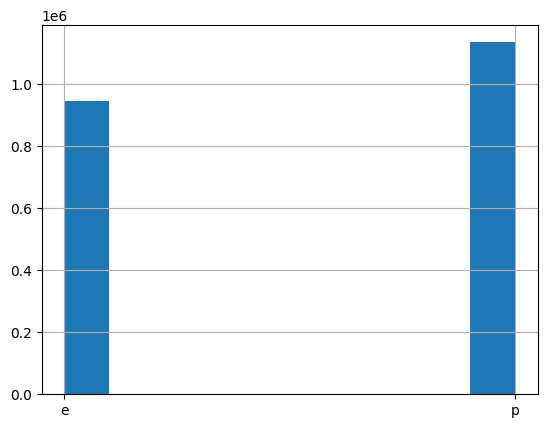

In [42]:
df_sub['class'].hist()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡Refrences :</font></h3>

<div style="background-color: black; padding: 20px; border-radius: 10px; margin: 20px auto; max-width: 600px;">
    <center>
        <div style="background-color: white; padding: 20px; border-radius: 10px;">
            <b style="font-size: 24px; color: #ff6600;">👏😊 &nbsp; IF YOU FIND THIS HELPFUL, PLEASE UPVOTE! &nbsp; 💢👏</b>
            <div style="margin-top: 20px; font-size: 18px; color: black;">
                🥽🖥This took quite a bit of effort on my part, and while it might seem trivial, 🏆🏆receiving your appreciation means a lot to me! 😅🎃 Your upvotes inspire me to keep creating helpful content like this🖥🍱.                    
            </div>
        </div>
    </center>
</div>